In [ ]:
# RFE - Recursive Feature Elimination
  - RFE  is an efficient approach for eliminating features from a training dataset for feature selection.
  - How to use RFE for feature selection for classification and regression predictive modeling problems.
  - How to explore the number of selected features and wrapped algorithm used by the RFE procedure.
    
## Notes
  - conda install -c conda-forge imbalanced-learn
  - The RFE method is available via the RFE class in scikit-learn.
    -  RFE is a transform
       - configured with the chosen algorithm specified via the “estimator” argument
       - the number of features to select via the “n_features_to_select” argument
  
    



## RFE for Classification

In [8]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define datasetRecursive Feature Elimination
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
"""
X.shape: (1000,10)
y.shape : (1000,)
n_scores
  type(n_scores):numpy.ndarray; 
  array([-22.98869601, -29.55028295,....]) 
  shape:(30,)
"""


# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.888 (0.033)


In [10]:
n_scores.shape

(30,)

## RFE Hyperparameters
 -  the hyperparameters : Explore Number of Features
 -  tuning for the RFE method for feature selection and their effect on model performance.       


>2 0.720 (0.045)
>3 0.818 (0.032)
>4 0.877 (0.035)
>5 0.886 (0.030)
>6 0.892 (0.027)
>7 0.887 (0.030)
>8 0.885 (0.027)
>9 0.887 (0.028)


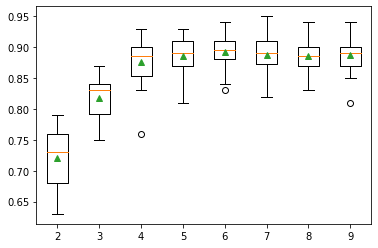

In [1]:

# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [1]:
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
"""
X.shape: (1000,10)
y.shape : (1000,)
n_scores
  type(n_scores):numpy.ndarray; 
  array([-22.98869601, -29.55028295,....]) 
  shape:  (30, )  ??? Why
"""
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -27.292 (2.899)


In [7]:
y.shape

(1000,)